In [1]:
from collections import deque # Needed for the queue
import random

In [2]:
# A class to represent the 8s puzzle sliding tile game
class PuzzleN():
    
    # Create a new game board. Pass a size for the game board. 
    # Optionally also pass a set of tile positions.
    def __init__(self, size = (3, 3), tiles = None):

        # A variable storing the characeter we use as the blank
        # Done this way to avoid a hard coded string being repeated in the code, 
        # this could lead to errors as we might get it wrong sometimes
        self.blankChar = " "
        self.size = size

        if tiles == None:
            letters = ["A", "B", "C", "D","E","F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
            letter_counter = 0
            label = " "
            self.middle_tile_pos = (round((self.size[0] - 1)/2), round((self.size[1] - 1)/2))
            self.tiles = list()
            for i in range(0, size[0]) :
                self.tiles.append(list())
                for j in range(0, size[1]):
                    
                    if((i == self.middle_tile_pos[0]) and (j == self.middle_tile_pos[1])):
                        self.tiles[i].append(self.blankChar)
                    else:
                        label = label[:-1] + letters[letter_counter]
                        self.tiles[i].append(label)

                        # Update the letter count. If we have gotten to the end of the alphabet, then add another charatcer to the labels
                        letter_counter = letter_counter + 1
                        if(letter_counter == len(letters)):
                            label = label[:-1] + letters[0] + " "
                            letter_counter = 0
                    
        else:
            self.tiles = tiles
            
    # Shuffle the game board
    def shuffle(self, numMoves = 1000):
        
        # perform a large number of random moves
        for i in range(0, numMoves):
            move = random.choice(["left", "right", "up", "down"])
            self.moveBlank(move)
            
        # Note the position of the blank, as it has probably moved
        self.blankPos = self.getBlankPos()
      
    # Print the game board. If short is True then a one line version is printed
    def printTiles(self, short = False):

        if short == True:
            board_string = "| "
            for i in range(0, self.size[0]) :
                for j in range(0, self.size[1]):
                    board_string = board_string + self.tiles[i][j] + " | "
            print(board_string)
        else:
            print(" " + "----"*self.size[1])
            for i in range(0, self.size[0]) :
                board_string = "| "
                for j in range(0, self.size[1]):
                    board_string = board_string + self.tiles[i][j] + " | "
                print(board_string)
                print(" " + "----"*self.size[1])
                
        
    # Find the position of the blank space - returns a list 
    # containing the row and column indices in that order
    def getBlankPos(self):
        row = -1
        col = -1
        for row in range(0, self.size[0]):
            if self.blankChar in self.tiles[row]:
                col = self.tiles[row].index(self.blankChar)
                break
        return [row, col]
          
    # Move the blank position. Paraetems is a string indicating the direction 
    # in which to move the blank
    def moveBlank(self, direction):
        
        # Make direction lowercase and trimmed
        direction = direction.lower()
        direction = direction.strip()
        
        # Find where the blank is - not really needed but just in case it has gone out of date!
        self.blankPos = self.getBlankPos()
        
        result = False
        
        # Check what direction is required and move appropriately
        # (use starts with so we can pass "left" or "l" etc)
        if direction.startswith("l"):
            result = self.moveBlankLeft()
        elif direction.startswith("r"):
            result = self.moveBlankRight()
        elif direction.startswith("u"):
            result = self.moveBlankUp()
        elif direction.startswith("d"):
            result = self.moveBlankDown()
        return result
        
        
    # Move the blank space one place to the left
    def moveBlankLeft(self):
        
        # Check that the blank is not already at the left limit. If it is leave it there and return false
        if(self.blankPos[1] == 0):
            return False
        else:
            self.tiles[self.blankPos[0]][self.blankPos[1]] = self.tiles[self.blankPos[0]][self.blankPos[1] - 1]
            self.tiles[self.blankPos[0]][self.blankPos[1] - 1] = self.blankChar
            return True
          
            
    # Move the blank space one place to the right
    def moveBlankRight(self):
        
        # Check that the blank is not already at the right limit. If it is leave it there and return false
        if(self.blankPos[1] == (self.size[1] - 1)):
            return False
        else:
            self.tiles[self.blankPos[0]][self.blankPos[1]] = self.tiles[self.blankPos[0]][self.blankPos[1] + 1]
            self.tiles[self.blankPos[0]][self.blankPos[1] + 1] = self.blankChar
            return True
        
        
    # Move the blank space one place up
    def moveBlankUp(self):
        
        # Check that the blank is not already at the top limit. If it is leave it there and return false
        if(self.blankPos[0] == 0):
            return False
        else:
            self.tiles[self.blankPos[0]][self.blankPos[1]] = self.tiles[self.blankPos[0] - 1][self.blankPos[1]]
            self.tiles[self.blankPos[0] - 1][self.blankPos[1]] = self.blankChar
            return True
        
        
    # Move the blank space one place down
    def moveBlankDown(self):
        
        # Check that the blank is not already at the bottom limit. If it is leave it there and return false
        if(self.blankPos[0] == (self.size[0] - 1)):
            return False
        else:
            self.tiles[self.blankPos[0]][self.blankPos[1]] = self.tiles[self.blankPos[0] + 1][self.blankPos[1]]
            self.tiles[self.blankPos[0] + 1][self.blankPos[1]] = self.blankChar
            return True
        
        
    # check if the current state of the board mathces a template
    # returns true is the board and template match and false otherwise
    def matchTemplate(self, template):
            
        # Check that the temaplte is the same size as the game board       
        if len(template) == 0 or len(template) != len(self.tiles) or len(template[0]) != len(self.tiles[0]):
            return False
       
        # If the sizes match iterate through the eloements in the boards caomparing each one. 
        # Assume from the start that they match, then if we get to the end without finding a mismatch they are the same
        # If we find any mismatch bail out
        else:
            
            match = True
            for r in range(0, len(template)):
                for c in range(0, len(template[r])):

                    # If there is a mismatch get out
                    if self.tiles[r][c] != template[r][c]:
                        match = False
                        break
            
            return match
    
    # Calculate the distance between this board and a template board
    def getSimilarity(self, template):

        # Count the number of tiles that are in the right place
        matches = 0
        for r in range(0, len(self.tiles)):
            for c in range(0, len(self.tiles[0])):

                # If the tiles match update the counter
                if self.tiles[r][c] == template.tiles[r][c]:
                    matches += 1

        return matches
    
    # Overload == and != opertors so we can easily search lists for boards
    def __eq__(self, other):
        return self.matchTemplate(other.tiles)
    def __ne__(self, other):
        return not self.matchTemplate(other.tiles)

In [3]:
p = PuzzleN((5, 6))
p.printTiles()

 ------------------------
| A | B | C | D | E | F | 
 ------------------------
| G | H | I | J | K | L | 
 ------------------------
| M | N |   | O | P | Q | 
 ------------------------
| R | S | T | U | V | W | 
 ------------------------
| X | Y | Z | AA | AB | AC | 
 ------------------------


In [4]:
# Constructor and printing
p = PuzzleN((3, 3))
p.printTiles()
print()
p.printTiles(True)
print("********")
p = PuzzleN((7, 7))
p.printTiles()
print()
p.printTiles(True)
print("********")
p = PuzzleN((3, 5))
print()
p.printTiles()
print()
p.printTiles(True)
print("********")

# Template matching
p1 = PuzzleN((3, 3))
p2 = PuzzleN((3, 3))
print(p1.matchTemplate(p2.tiles))
p2.shuffle()
print(p1.matchTemplate(p2.tiles))

# Similarity scoring
p1 = PuzzleN((3, 3))
p2 = PuzzleN((3, 3))
print(p1.getSimilarity(p2))
p2.shuffle()
print(p1.getSimilarity(p2))

 ------------
| A | B | C | 
 ------------
| D |   | E | 
 ------------
| F | G | H | 
 ------------

| A | B | C | D |   | E | F | G | H | 
********
 ----------------------------
| A | B | C | D | E | F | G | 
 ----------------------------
| H | I | J | K | L | M | N | 
 ----------------------------
| O | P | Q | R | S | T | U | 
 ----------------------------
| V | W | X |   | Y | Z | AA | 
 ----------------------------
| AB | AC | AD | AE | AF | AG | AH | 
 ----------------------------
| AI | AJ | AK | AL | AM | AN | AO | 
 ----------------------------
| AP | AQ | AR | AS | AT | AU | AV | 
 ----------------------------

| A | B | C | D | E | F | G | H | I | J | K | L | M | N | O | P | Q | R | S | T | U | V | W | X |   | Y | Z | AA | AB | AC | AD | AE | AF | AG | AH | AI | AJ | AK | AL | AM | AN | AO | AP | AQ | AR | AS | AT | AU | AV | 
********

 --------------------
| A | B | C | D | E | 
 --------------------
| F | G |   | H | I | 
 --------------------
| J | K | L | M | N | 
 ---

In [5]:
import copy

class SearchState:
    
    def __init__(self, board, parent = None, moveFromParent = ""):
        # Store links tot he parent of this state and the move that got from there to here
        self.parent = parent
        self.moveFromParent = moveFromParent
        
        # Make a deep copy of the board
        self.board = copy.deepcopy(board)
        
        # Make an empty list for children
        self.children = list()

        # Store how far down the search tree this search state is
        if parent is not None:
            self.treeDepth = parent.treeDepth + 1
        else:
            self.treeDepth = 0
    
    # Generate the list of the child states of this node
    def createChildren(self):
        
        # Iterate through all possible moves trying to kae a child
        for m in ['left', 'right', 'up', 'down']:
            # Create a copy of the current board and perofrm the move in it
            childBoard = copy.deepcopy(self.board)
            legalMove = childBoard.moveBlank(m)
            
            # As long as the move was allowed then add it to the child list
            if legalMove == True:
                childState = SearchState(childBoard, self, m)
                self.children.append(childState)

    # Print the search state     
    def show(self, short = False, showChildren = True, showParent= True):
        self.board.printTiles(short)
        
        # If there are children then print them too
        if showChildren and len(self.children) > 0:
            print("CHILDREN")
            for c in self.children:
                print(c.moveFromParent)
                c.show(short, False, False)
        
        # If there is one print the parent
        if showParent and self.parent is not None:
            print("PARENT")
            self.parent.show(short, False, False)
                
    # Calculate the simialrity between this state and another state (how many positions are the same)
    def getSimilarity(self, other):
        return self.board.getSimilarity(other.board)

    # Overload == and != opertors so we can easily search lists for boards
    def __eq__(self, other):
        return self.board == other.board
    def __ne__(self, other):
        return self.board != other.board

In [6]:
import heapq

class PriorityQueue:
    def __init__(self):
        self._queue = []
        self._index = 0

    def push(self, item, priority):
        heapq.heappush(self._queue, (-priority, self._index, item))
        self._index += 1

    def pop(self):
        return heapq.heappop(self._queue)[-1]
    
    def __len__(self):
        return self._index

In [7]:
# A class to perform a breadth first search
class BestFirstSearch:
    
    # Constructor
    def __init__(self):
        self.root = None
        self.queue = PriorityQueue()
    
    # Perform a search from a start state to a goal state
    def search(self, start, goal):
        
        # Count the number of states searched
        count = 0
        
        # Create a search state object from the starting state
        root = start
        
        # Calcualte the match between the root and the goal
        similarity = root.getSimilarity(goal)
        
        # Put the starting state on top of the stack
        self.queue.push(root, similarity)
        
        # While there are more states on the stack keep seearching
        while len(self.queue) > 0:
            
            # Pop the latest state off the stack
            currentState = self.queue.pop()
            
            # Check if the current state is the goal - if so we are done!
            if currentState == goal:
                
                # Print some details
                #print("FOUND!!!!")
                #print("States searched " + str(count))
                #currentState.show(True, False, False)
                #print("QUEUE " + str(len(self.queue)))
                
                # Iterate back through the parents to find the move sequence to get here
                state = currentState
                moveList = list()
                while state.parent is not None:
                    moveList.append(state.moveFromParent)
                    state = state.parent                
                moveList.reverse() # Reverse the list of moves and print to get the sequence to win!
                return moveList # Return the list of moves that corresponds to the solution
            
            # if the current state has children add those that are not on the queue to the queue
            currentState.createChildren()
            for c in currentState.children:
                
                # Check if the current child state has already been considered on the way to this point in the tree
                # Move back up the tree using the parent links and compare each parent with the current state
                movingState = currentState
                currentStateAlreadyOnPath = False
                while movingState.parent is not None:
                    movingState = movingState.parent
                    if(movingState == c):
                        currentStateAlreadyOnPath = True
                        break
                
                # Only put the current state onto the stack if it isn't already on the path here
                if currentStateAlreadyOnPath == False:
                    
                    # Calcualte the match between the child and the goal and use this as the priority
                    # priority = c.getSimilarity(goal)
                    
                    # An alternative for similarity that favours short paths
                    # Calculate the match between the child and the goal and subtract the tree depth of the child 
                    # use this as the priority
                    priority = c.getSimilarity(goal) - c.treeDepth
                    
                    # Add the child to the queue
                    self.queue.push(c, priority)
                    
                    
                
            # Increment the number of states searched
            count += 1   
                
            # Every thousand states seaerched print out the current state of affairs
            if(count % 1000 == 0):
                print("------------------")
                currentState.show(True, False, False)
                print("States searched " + str(count))
                print("Tree depth: " + str(currentState.treeDepth))
                print("QUEUE " + str(len(self.queue)))

        # If we get to here it means we haven't ben able to find a solution so return None
        return None  
 

In [8]:
searcher = BestFirstSearch()

# Do a search
startBoard = PuzzleN((2,2))
startBoard.shuffle()
start = SearchState(startBoard)
goal = SearchState(PuzzleN((2,2)))

print("Start")
start.show()
print("Goal")
goal.show()

moves = searcher.search(start, goal)

# Print the path to a solution
if moves is not None:
    start.board.printTiles()
    count = 1
    for m in moves:
        print(" ")
        print("Move " + str(count) + " " + m)
        start.board.moveBlank(m)
        start.board.printTiles()
        count += 1

Start
 --------
| A | C | 
 --------
|   | B | 
 --------
Goal
 --------
|   | A | 
 --------
| B | C | 
 --------
 --------
| A | C | 
 --------
|   | B | 
 --------
 
Move 1 right
 --------
| A | C | 
 --------
| B |   | 
 --------
 
Move 2 up
 --------
| A |   | 
 --------
| B | C | 
 --------
 
Move 3 left
 --------
|   | A | 
 --------
| B | C | 
 --------


In [9]:
# A class to perform a breadth first search
class BreadthFirstSearch:
    
    # Constructor
    def __init__(self):
        self.root = None
        self.queue = deque()
    
    # Perform a search from a start state to a goal state
    def search(self, start, goal):
        
        # Count the number of states searched
        count = 0
        
        # Create a search state object from the starting state
        root = start
        
        # Put the starting state on top of the stack
        self.queue.append(root)
        
        # While there are more states on the stack keep seearching
        while len(self.queue) > 0:
            
            # Pop the latest state off the stack
            currentState = self.queue.popleft()
            
            # Check if the current state is the goal - if so we are done!
            if currentState == goal:
                
                # Print some details
                #print("FOUND!!!!")
                #print("States searched " + str(count))
                #currentState.show(True, False, False)
                #print("QUEUE " + str(len(self.queue)))
                
                # Iterate back through the parents to find the move sequence to get here
                state = currentState
                moveList = list()
                while state.parent is not None:
                    moveList.append(state.moveFromParent)
                    state = state.parent                
                moveList.reverse() # Reverse the list of moves and print to get the sequence to win!
                return moveList # Return the list of moves that corresponds to the solution
            
            # if the current state has children add those that are not on the queue to the queue
            currentState.createChildren()
            for c in currentState.children:
                
                # Check if the current child state has already been considered on the way to this point in the tree
                # Move back up the tree using the parent links and compare each parent with the current state
                movingState = currentState
                currentStateAlreadyOnPath = False
                while movingState.parent is not None:
                    movingState = movingState.parent
                    if(movingState == c):
                        currentStateAlreadyOnPath = True
                        break
                
                # Only put the current state onto the stack if it isn't already on the path here
                if currentStateAlreadyOnPath == False:
                    self.queue.append(c)
                
            # Increment the number of states searched
            count += 1   
                
            # Every thousand states seaerched print out the current state of affairs
            if(count % 1000 == 0):
                print("------------------")
                currentState.show(True, False, False)
                print("States searched " + str(count))
                print("Tree depth: " + str(currentState.treeDepth))
                print("QUEUE " + str(len(self.queue)))

        # If we get to here it means we haven't ben able to find a solution so return None
        return None  
 

In [10]:
searcher = BreadthFirstSearch()

# Do a search
startBoard = PuzzleN((2, 2))
startBoard.shuffle()
start = SearchState(startBoard)
goal = SearchState(PuzzleN((2,2)))

print("Start")
start.show()
print("Goal")
goal.show()

moves = searcher.search(start, goal)

# Print the path to a solution
if moves is not None:
    start.board.printTiles()
    count = 1
    for m in moves:
        print(" ")
        print("Move " + str(count) + " " + m)
        start.board.moveBlank(m)
        start.board.printTiles()
        count += 1

Start
 --------
| B | A | 
 --------
|   | C | 
 --------
Goal
 --------
|   | A | 
 --------
| B | C | 
 --------
 --------
| B | A | 
 --------
|   | C | 
 --------
 
Move 1 up
 --------
|   | A | 
 --------
| B | C | 
 --------



=== Comparison Summary ===
With 1000 simulations and a board size of (3, 3) with 10 shuffle moves
These are the results for the two searches

=== BestFS ===
0.001357385 seconds average time for BestFS
2.95 search state average length for BestFS

=== BFS ===
0.003224229 seconds average time for BFS
2.95 search state average length for BFS


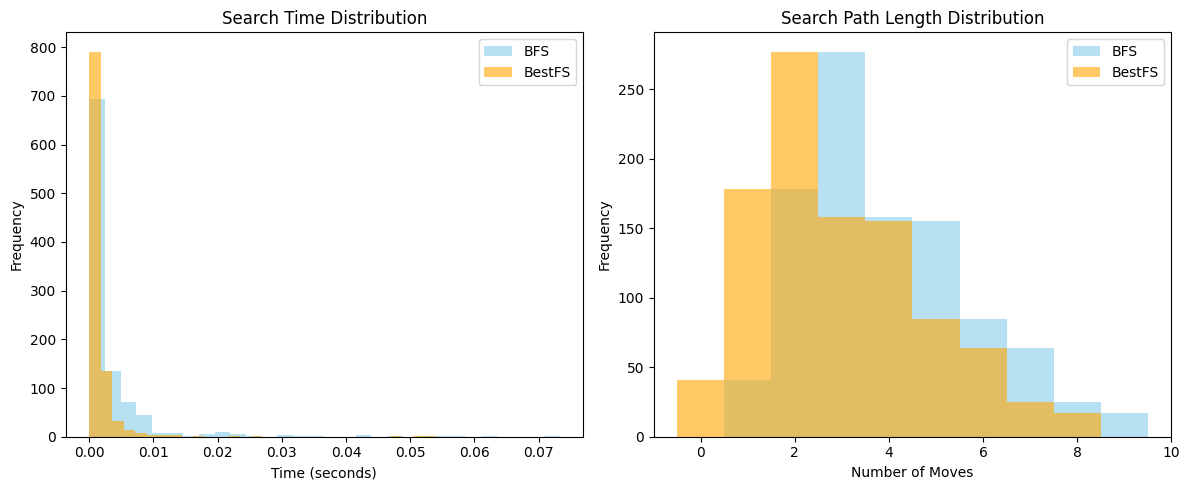

In [11]:
import time
import matplotlib.pyplot as plt
def compare_bfs_vs_bestfs(board_size=(3, 3), shuffle_moves=20,num_simulations=1000):
#================================================================================
# Create lists to store the results of the simulations
#================================================================================
    bfs_times = []
    bfs_lengths = []

    bestfs_times = []
    bestfs_lengths = []


#================================================================================
# Creating the star and goal boards
#================================================================================
    for sim in range(num_simulations):
     #   print(f"Simulation {sim + 1}/{num_simulations}")

        start_board = PuzzleN(board_size)
        start_board.shuffle(shuffle_moves)
        goal_board = PuzzleN(board_size)

    #print("Start board:")
    #start_board.printTiles()
    #print("Goal board:")
    #goal_board.printTiles()

        start_state = SearchState(start_board)
        goal_state = SearchState(goal_board)

#================================================================================
# Running and Timing the searches
#================================================================================
        bfs = BreadthFirstSearch()
        #print("\nRunning Breadth-First Search...")
        t0 = time.time()
        bfs_moves = bfs.search(start_state, goal_state)
        t1 = time.time()
        bfs_time = t1 - t0

   
        bestfs = BestFirstSearch()
        #print("\nRunning Best-First Search...")
        t2 = time.time()
        bestfs_moves = bestfs.search(start_state, goal_state)
        t3 = time.time()
        bestfs_time = t3 - t2
#================================================================================
# Storing the results
#================================================================================
        if bfs_moves is not None:
            bfs_times.append(bfs_time)
            bfs_lengths.append(len(bfs_moves))

        if bestfs_moves is not None:
            bestfs_lengths.append(len(bestfs_moves))
            bestfs_times.append(bestfs_time)
#================================================================================
# Creating a summary of the results
#================================================================================
    bfs_avg_time = sum(bfs_times)/len(bfs_times)
    bestfs_avg_time = sum(bestfs_times)/len(bestfs_times)
    bfs_avg_length = sum(bfs_lengths)/len(bfs_lengths)
    bestfs_avg_length = sum(bestfs_lengths)/len(bestfs_lengths)




#================================================================================
# Printing the results
#================================================================================
    
    print("\n=== Comparison Summary ===")
    print(f"With {num_simulations} simulations and a board size of {board_size} with {shuffle_moves} shuffle moves")
    print(f"These are the results for the two searches")
    print("===================================")
   
    print("\n=== BestFS ===")
    print(f"{bestfs_avg_time:.9f} seconds average time for BestFS")
    print(f"{bestfs_avg_length:.2f} search state average length for BestFS")

    print("\n=== BFS ===")
    print(f"{bfs_avg_time:.9f} seconds average time for BFS")
    print(f"{bfs_avg_length:.2f} search state average length for BFS")
    return bfs_times, bestfs_times, bfs_lengths, bestfs_lengths


#================================================================================
# Running the comparison and plotting the results
#================================================================================


def plot_histograms(bfs_times, bestfs_times, bfs_lengths, bestfs_lengths):
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(bfs_times, bins=30, alpha=0.6, label='BFS', color='skyblue')
    plt.hist(bestfs_times, bins=30, alpha=0.6, label='BestFS', color='orange')
    plt.title("Search Time Distribution")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency")
    plt.legend()

    
    plt.subplot(1, 2, 2)
    plt.hist(bfs_lengths, bins=range(min(bfs_lengths + bestfs_lengths), max(bfs_lengths + bestfs_lengths) + 1),align='right', alpha=0.6, label='BFS', color='skyblue')
    plt.hist(bestfs_lengths, bins=range(min(bfs_lengths + bestfs_lengths), max(bfs_lengths + bestfs_lengths) + 1),align='left', alpha=0.6, label='BestFS', color='orange')
    

    plt.title("Search Path Length Distribution")
    plt.xlabel("Number of Moves")
    plt.ylabel("Frequency")
    plt.legend()

    plt.tight_layout()
    plt.show()
    
bfs_times, bestfs_times, bfs_lengths, bestfs_lengths = compare_bfs_vs_bestfs(board_size=(3, 3),shuffle_moves=10,num_simulations=1000)

plot_histograms(bfs_times, bestfs_times, bfs_lengths, bestfs_lengths)